In [1]:
# Import dependencies
import pandas as pd
import sqlite3
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define the SQLite database file name and path
db_file = Path('house_data.db')

In [3]:
# Create a new SQLite database and a cursor object
conn = sqlite3.connect(db_file)
cur = conn.cursor()

In [4]:
# Read the housing data CSV file into a Pandas DataFrame
df_houses = pd.read_csv('housepricedata.csv')
df_houses.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
# Load the DataFrame into a new table in the SQLite database
df_houses.to_sql('houses', conn, if_exists='replace', index=False)

1460

In [6]:
# Retrieve the data from the SQLite table and store it in a new DataFrame
df_houses = pd.read_sql_query('SELECT * FROM houses', conn)


In [7]:
# Close the cursor and the database connection
cur.close()
conn.close()

In [8]:
# Calculate the correlation matrix
correlations = df_houses.corr()

correlations

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
LotArea,1.000000,0.105806,-0.005636,0.260833,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.189180
OverallQual,0.105806,1.000000,-0.091932,0.537808,0.550600,0.273458,0.101676,0.427452,0.396765,0.562022,0.672486
OverallCond,-0.005636,-0.091932,1.000000,-0.171098,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.151521,-0.141429
TotalBsmtSF,0.260833,0.537808,-0.171098,1.000000,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.438301
FullBath,0.126031,0.550600,-0.194149,0.323722,1.000000,0.136381,0.363252,0.554784,0.243671,0.405656,0.615951
HalfBath,0.014259,0.273458,-0.060769,-0.048804,0.136381,1.000000,0.226651,0.343415,0.203649,0.163549,0.308644
BedroomAbvGr,0.119690,0.101676,0.012980,0.050450,0.363252,0.226651,1.000000,0.676620,0.107570,0.065253,0.144853
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.285573,0.554784,0.343415,0.676620,1.000000,0.326114,0.337822,0.417355
Fireplaces,0.271364,0.396765,-0.023820,0.339519,0.243671,0.203649,0.107570,0.326114,1.000000,0.269141,0.420297
GarageArea,0.180403,0.562022,-0.151521,0.486665,0.405656,0.163549,0.065253,0.337822,0.269141,1.000000,0.505068


In [9]:
# Show the correlations with the "AboveMedianPrice" variable
print(correlations['AboveMedianPrice'])

LotArea             0.189180
OverallQual         0.672486
OverallCond        -0.141429
TotalBsmtSF         0.438301
FullBath            0.615951
HalfBath            0.308644
BedroomAbvGr        0.144853
TotRmsAbvGrd        0.417355
Fireplaces          0.420297
GarageArea          0.505068
AboveMedianPrice    1.000000
Name: AboveMedianPrice, dtype: float64


In [10]:
# Show the summary statistics
summary_stats = df_houses.describe()
summary_stats

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


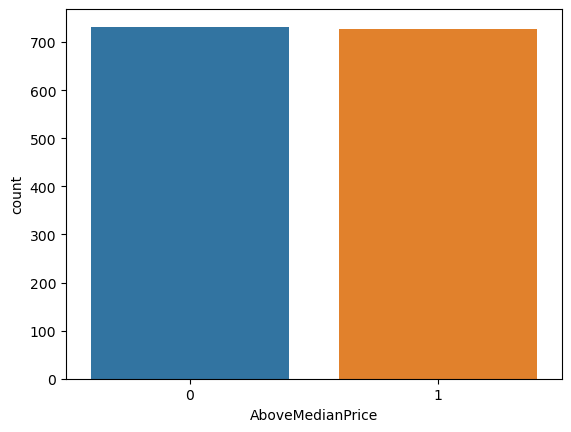

In [11]:
# Plot the distribution of the target variable
sns.countplot(x='AboveMedianPrice', data=df_houses)
plt.show()

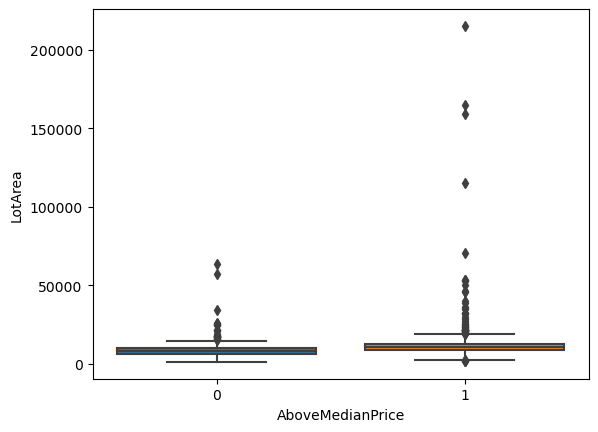

In [12]:
# Show potential outliers in our target variable
sns.boxplot(x='AboveMedianPrice', y='LotArea', data=df_houses)
plt.show()

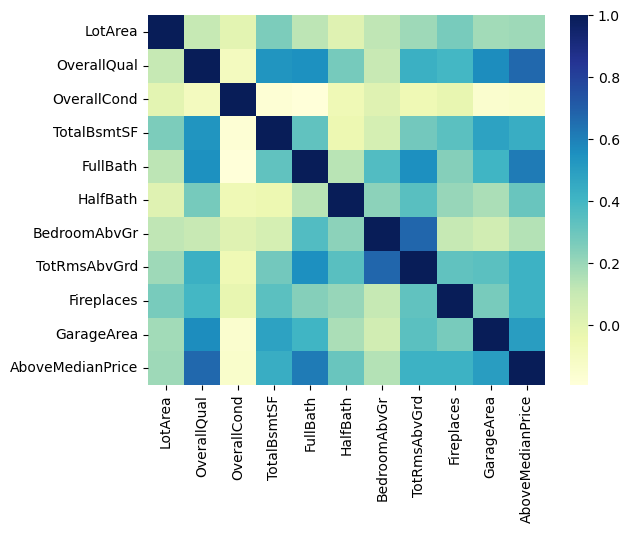

In [13]:
# Plot the correlation matrix as a heatmap
sns.heatmap(df_houses.corr(), cmap='YlGnBu')
plt.show()

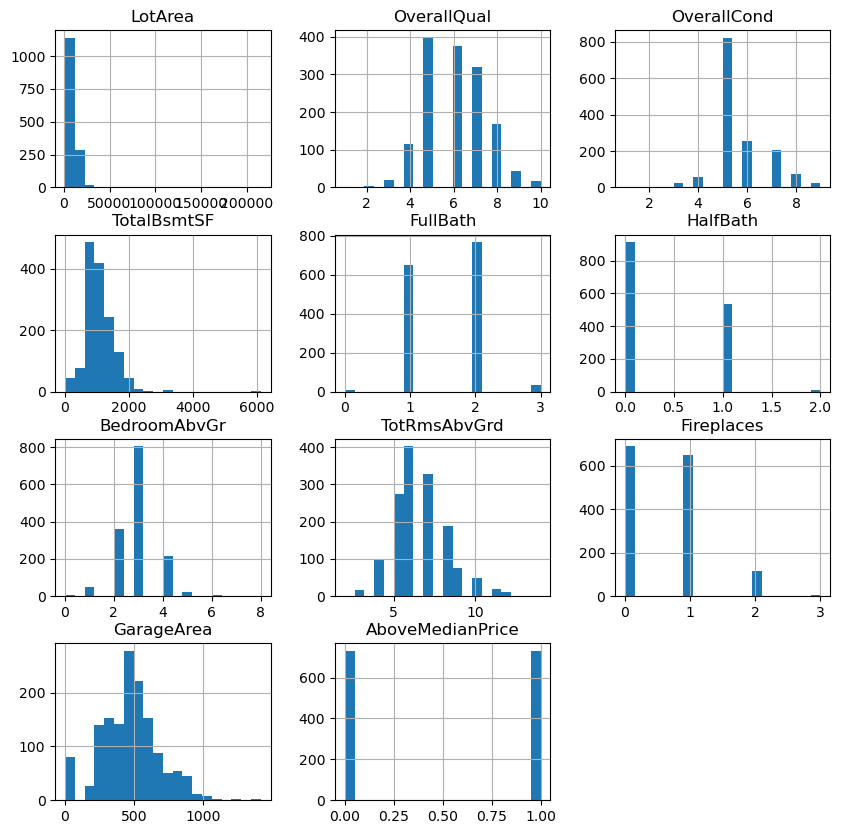

In [14]:
# Show the distribution of each variable
df_houses.hist(figsize=(10,10), bins=20)
plt.show()


In [15]:
# Separate dataframe into target and features
y = df_houses['AboveMedianPrice']
X = df_houses.drop(columns='AboveMedianPrice')

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create logistic regression object
lr = LogisticRegression()

# Fit the model on training data
lr.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = lr.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9200913242009132
Precision: 0.897196261682243
Recall: 0.9365853658536586
F1 Score: 0.9164677804295943


<AxesSubplot:>

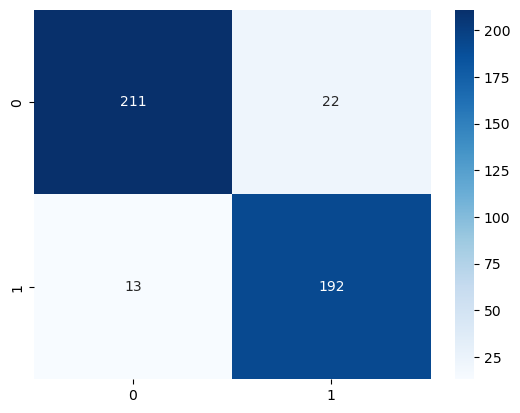

In [19]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [20]:
# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       233
           1       0.90      0.94      0.92       205

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.92       438



In [21]:
# Save a dataframe including the variables with the highest correlation to our target variable for testing
highest_corr = df_houses[['OverallQual', 'FullBath', 'GarageArea', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd']]

highest_corr.head()

,OverallQual,FullBath,GarageArea,TotalBsmtSF,Fireplaces,TotRmsAbvGrd
0,7,2,548,856,0,8
1,6,2,460,1262,1,6
2,7,2,608,920,1,6
3,7,1,642,756,1,7
4,8,2,836,1145,1,9


In [22]:
# Create new model using only highly correlated variables as features 
y = df_houses['AboveMedianPrice']
X = highest_corr

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting on the test set and calculating accuracy
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8995433789954338
Precision: 0.8926829268292683
Recall: 0.8926829268292683
F1 Score: 0.8926829268292683
